Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 2)]                  0         []                            
                                                                                                  
 dense_6 (Dense)             (None, 20)                   60        ['input_2[0][0]']             
                                                                                                  
 concatenate_1 (Concatenate  (None, 22)                   0         ['input_2[0][0]',             
 )                                                                   'dense_6[0][0]']             
                                                                                                  
 dense_7 (Dense)             (None, 2)                    46        ['concatenate_1[0][0]'] 

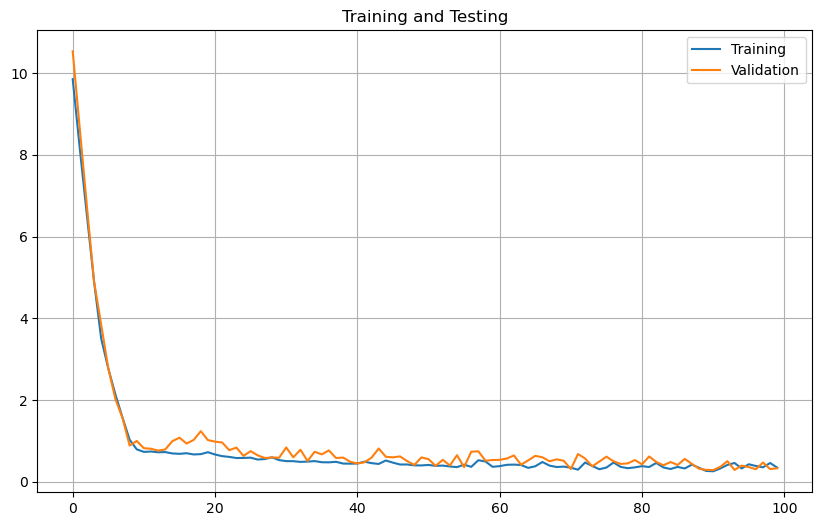

In [16]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Function of Two Variables
def func(x):
    y = np.cos(x[0]) / x[1] - np.sin(x[0]) / x[1]**2
    z = np.sin(x[0] / 2) + y * np.sin(x[0])
    return y, z

# Collecting Dataset
x = np.linspace(12, 19, 7)
x0, x1 = np.meshgrid(x, x)
x0, x1 = x0.ravel(), x1.ravel()
X = [[x0[i], x1[i]] for i in range(len(x0))]
y, z = zip(*[func(x) for x in X])

split = int(len(X) * 0.8)
x_train, y_train, z_train = X[:split], y[:split], z[:split]
x_test, y_test, z_test = X[split:], y[split:], z[split:]

# Function to display
def visual(his):
    loss = his.history['loss']
    val_loss = his.history['val_loss']
    epochs = range(len(loss))
    
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, loss, label='Training')
    plt.plot(epochs, val_loss, label='Validation')
    plt.title('Training and Testing')
    plt.legend()
    plt.grid()
    plt.show()

# Model with 1 inner layer and 20 neurons
inputs = tf.keras.Input(shape=(2,))
x = tf.keras.layers.Dense(20, activation='relu')(inputs)
outputs = tf.keras.layers.Dense(2)(tf.keras.layers.concatenate([inputs, x]))  # Two outputs for y and z
model_cf1 = tf.keras.Model(inputs, outputs)

model_cf1.summary()

model_cf1.compile(
    optimizer=tf.keras.optimizers.SGD(
        learning_rate=tf.keras.optimizers.schedules.ExponentialDecay(0.001, decay_steps=75, decay_rate=0.96)
    ),
    loss='mae',
    metrics=['mae']
)

# Train the model
history_cf1 = model_cf1.fit(
    np.array(x_train), np.array([y_train, z_train]).T,  # Two outputs
    epochs=100,
    validation_data=(np.array(x_test), np.array([y_test, z_test]).T),
)

# Display learning curves
visual(history_cf1)
